# Enron POI Classifier Optimization

** Loading the data **

In [1]:
import pickle
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

#### Total number of data points:

In [2]:
len(data_dict.keys())

146

#### Features and number of features

In [3]:
all_features = []
c = 0
for key in data_dict:
    if c < 1:
        for feature in data_dict[key]:
            all_features.append(feature)
        c += 1
print "Features: \n{}".format(all_features)
print "Number of features: {}".format(len(all_features))

Features: 
['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']
Number of features: 21


## Task 1: Select what features you'll use.
 
features_list is a list of strings, each of which is a feature name. The first feature must be "poi". 

From above list of available features, all were included except for email_address (since it's not expected to be a good contributor to the algorithm and it cannot be converted to a numpy array).

In [4]:
features_list = ['poi']

In [5]:
for feature in all_features:
    if feature != 'poi' and feature != 'email_address':
        features_list.append(feature)

In [6]:
features_list

['poi',
 'salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'from_poi_to_this_person']

In [7]:
len(features_list)

20

## Task 2: Remove outliers

This was done as what was done in the class--remove "TOTAL". Another data point which looked like it wasn't a person was also removed ("THE TRAVEL AGENCY IN THE PARK").

In [8]:
from feature_format import featureFormat, targetFeatureSplit

In [9]:
data = featureFormat(data_dict, features_list)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Plotting a few features

In [11]:
def plotFeatures(data, features_list, feature_x, feature_y):
    """Plots 2 features against each other in a scatter plot.
        data - numpy array that contains the features
        feature_x - feature for x axis
        feature_y - feature that goes in the y-axis
    """
    for point in data:
        x = point[features_list.index(feature_x)]
        y = point[features_list.index(feature_y)]
        if point[0] == 1.0:
            plt.scatter(x, y, color='r', marker='*')
        else:
            plt.scatter(x, y)
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.show()

*** salary vs. bonus***

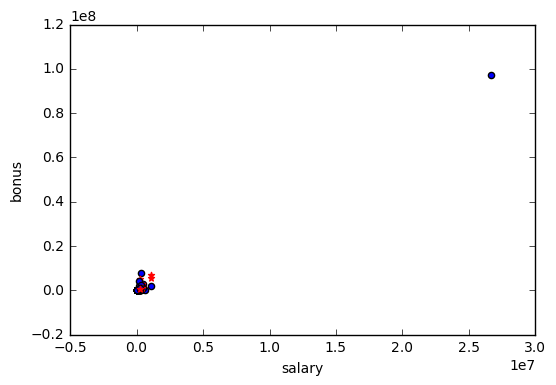

In [12]:
plotFeatures(data, features_list, 'salary', 'bonus')

Lone point in the upper far right is an outlier. Remembering from the outliers mini_project that this is the entry called "TOTAL":

In [13]:
data_dict.pop("TOTAL")

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

Examining all the other remaining keys, one more name that does not look like a person is "THE TRAVEL AGENCY IN THE PARK" so it was also removed:

In [14]:
data_dict.pop('THE TRAVEL AGENCY IN THE PARK')

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

Recreating data using the featureFormat function and replotting salary vs. bonus:

In [15]:
data = featureFormat(data_dict, features_list)

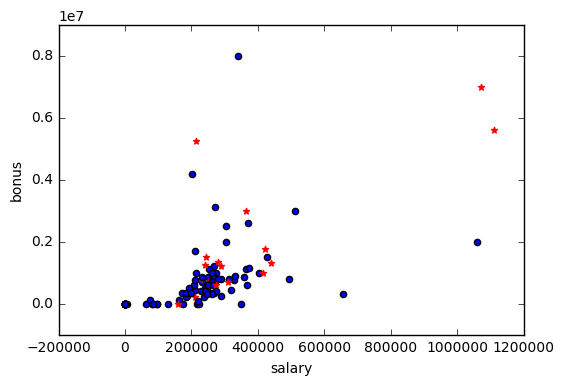

In [16]:
plotFeatures(data, features_list, 'salary', 'bonus')

To explore the data further, we can create scatterplots for other features, though this involves creating 
```
    20!
--------------
2! * (20 - 2)!
```
plots (190). Just plotting a few of them here:

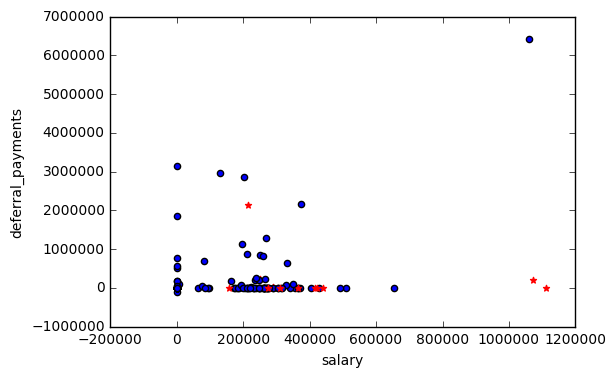

In [17]:
plotFeatures(data, features_list, 'salary', 'deferral_payments')

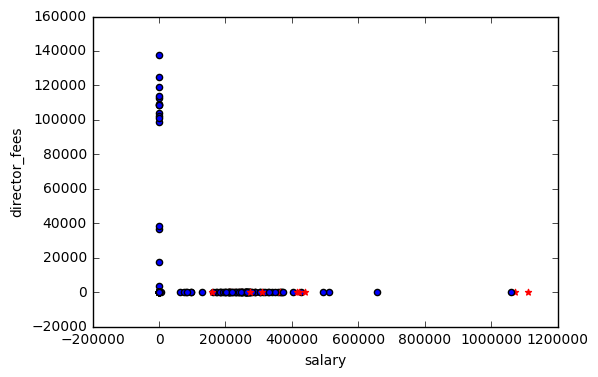

In [18]:
plotFeatures(data, features_list, 'salary', 'director_fees')

## Task 3: Create new feature(s)

As discussed in class, the email features are more appropriately converted to fraction rather than just raw number of emails to and from poi.

In [19]:
def computeFraction(poi_messages, all_messages):
    """ given a number messages to/from POI (numerator) 
        and number of all messages to/from a person (denominator),
        return the fraction of messages to/from that person
        that are from/to a POI
    """
    if poi_messages != 'NaN' or all_messages != 'NaN':
        fraction = float(poi_messages) / float(all_messages)
    else:
        fraction = 0
    return fraction

In [20]:
for name in data_dict:
    data_point = data_dict[name]
    
    from_poi_to_this_person = data_point["from_poi_to_this_person"]
    to_messages = data_point["to_messages"]
    fraction_from_poi = computeFraction(from_poi_to_this_person, to_messages)
    
    data_point["fraction_from_poi"] = fraction_from_poi
    
    from_this_person_to_poi = data_point["from_this_person_to_poi"]
    from_messages = data_point["from_messages"]
    fraction_to_poi = computeFraction( from_this_person_to_poi, from_messages )
    
    data_point["fraction_to_poi"] = fraction_to_poi

Checking whether the new features were added:

In [21]:
c = 0
for key in data_dict:
    if c < 1:
        for feature in data_dict[key]:
            print feature
        c += 1

to_messages
deferral_payments
expenses
poi
deferred_income
email_address
long_term_incentive
fraction_from_poi
restricted_stock_deferred
shared_receipt_with_poi
loan_advances
from_messages
other
director_fees
bonus
total_stock_value
from_poi_to_this_person
from_this_person_to_poi
restricted_stock
salary
total_payments
fraction_to_poi
exercised_stock_options


Creation of all_features again:

In [22]:
all_features = []
c = 0
for key in data_dict:
    if c < 1:
        for feature in data_dict[key]:
            all_features.append(feature)
        c += 1

In [23]:
all_features

['to_messages',
 'deferral_payments',
 'expenses',
 'poi',
 'deferred_income',
 'email_address',
 'long_term_incentive',
 'fraction_from_poi',
 'restricted_stock_deferred',
 'shared_receipt_with_poi',
 'loan_advances',
 'from_messages',
 'other',
 'director_fees',
 'bonus',
 'total_stock_value',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'restricted_stock',
 'salary',
 'total_payments',
 'fraction_to_poi',
 'exercised_stock_options']

In [24]:
len(all_features)

23

It is now only appropriate to remove the raw email features, "from_poi_to_this_person", "from_this_person_to_poi", "from_messages" and "to_messages".

In [25]:
features_remove = ["poi", "email_address", "from_poi_to_this_person", "from_this_person_to_poi", "from_messages", "to_messages"]

Removing the elements in "features_remove" from the list to create features_list:

In [26]:
features_list = ["poi"]
for feature in all_features:
    if feature not in features_remove:
        features_list.append(feature)
print "features_list = {}".format(features_list)

features_list = ['poi', 'deferral_payments', 'expenses', 'deferred_income', 'long_term_incentive', 'fraction_from_poi', 'restricted_stock_deferred', 'shared_receipt_with_poi', 'loan_advances', 'other', 'director_fees', 'bonus', 'total_stock_value', 'restricted_stock', 'salary', 'total_payments', 'fraction_to_poi', 'exercised_stock_options']


In [27]:
len(features_list)

18

Exploring the data again, this time using histograms:

In [28]:
data = featureFormat(data_dict, features_list)

In [29]:
poi = []
non_poi = []
for point in data:
    if point[0]==1.0:
        poi.append(point)
    else:
        non_poi.append(point)

In [30]:
len(poi)

18

In [31]:
len(non_poi)

125

In [32]:
poi = np.array(poi)
non_poi = np.array(non_poi)

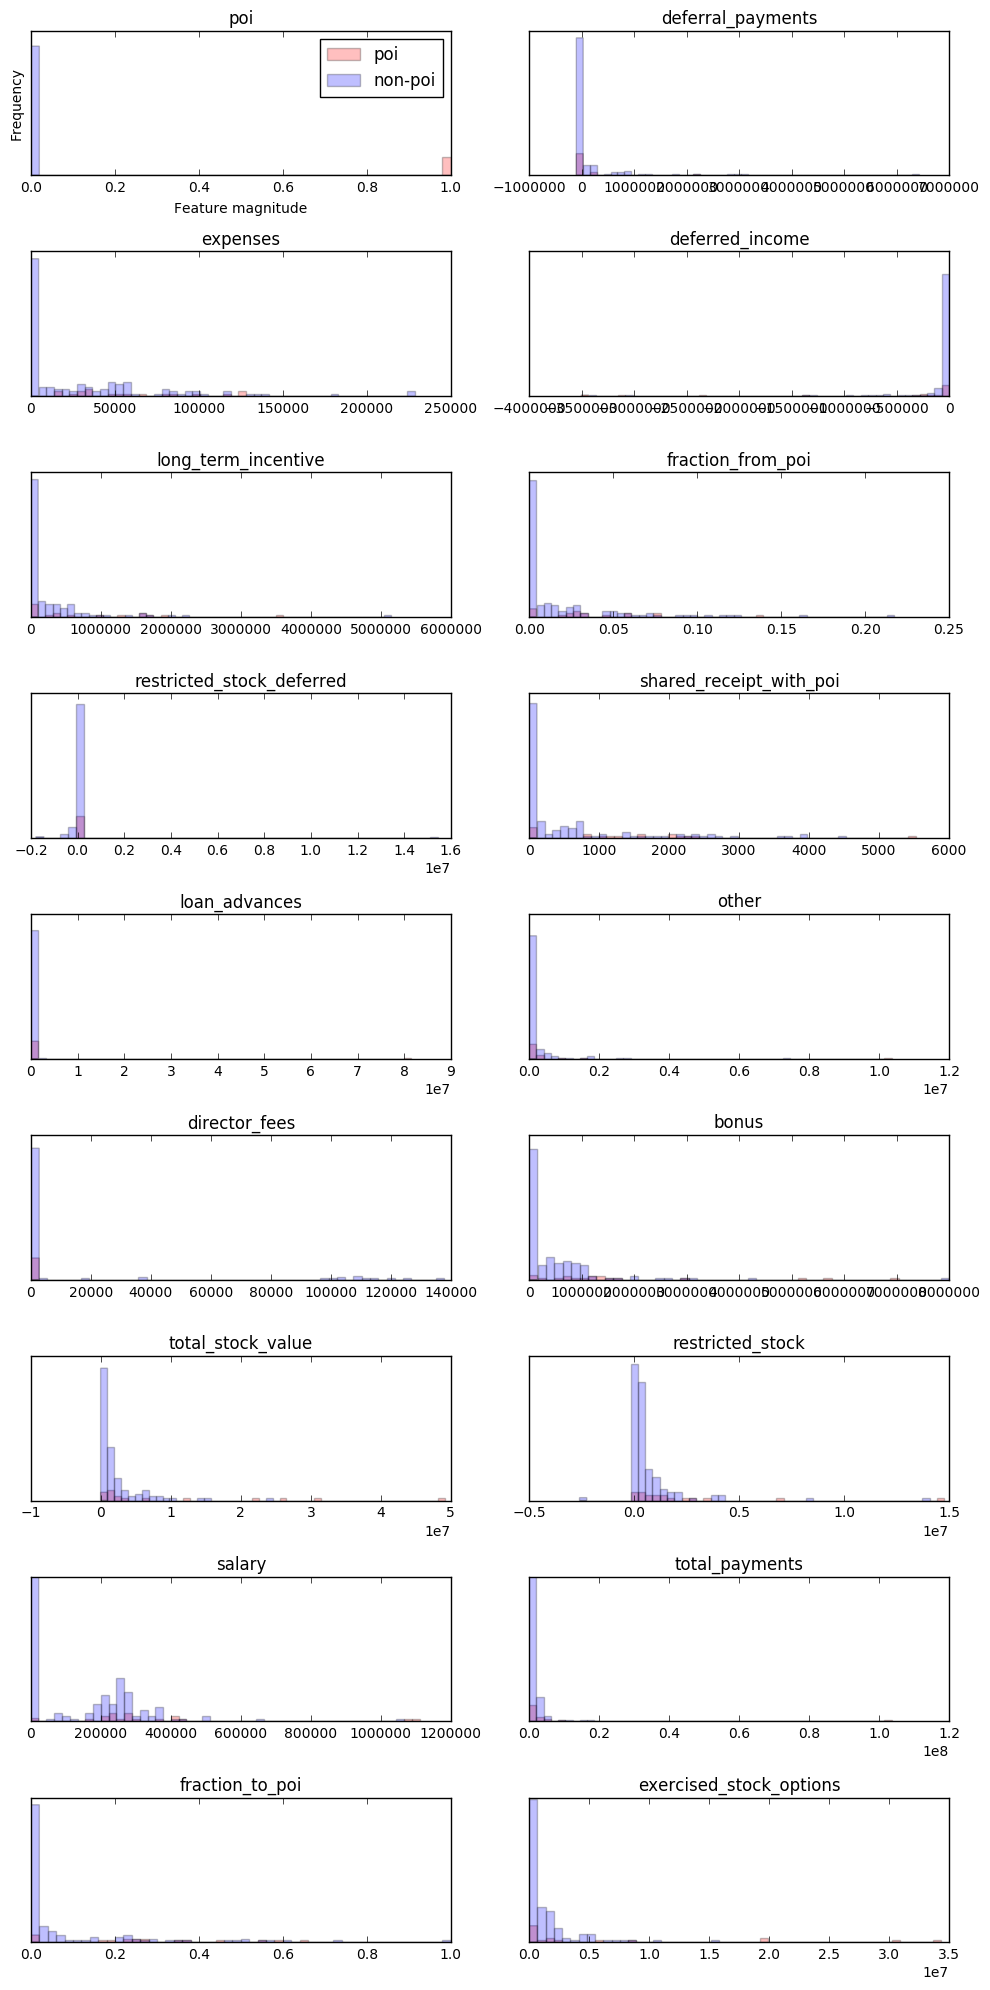

In [33]:
fig, axes = plt.subplots(9, 2, figsize=(10,20))
ax = axes.ravel()
for i, _ in enumerate(features_list):
    _, bins = np.histogram(data[:, i], bins=50)
    ax[i].hist(poi[:, i], bins=bins, color='r', alpha=0.25)
    ax[i].hist(non_poi[:, i], bins=bins, color='b', alpha=0.25)
    ax[i].set_title(features_list[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["poi", "non-poi"], loc="best")
fig.tight_layout()

Replotting above histograms and setting the y-axis limits to 0-10:

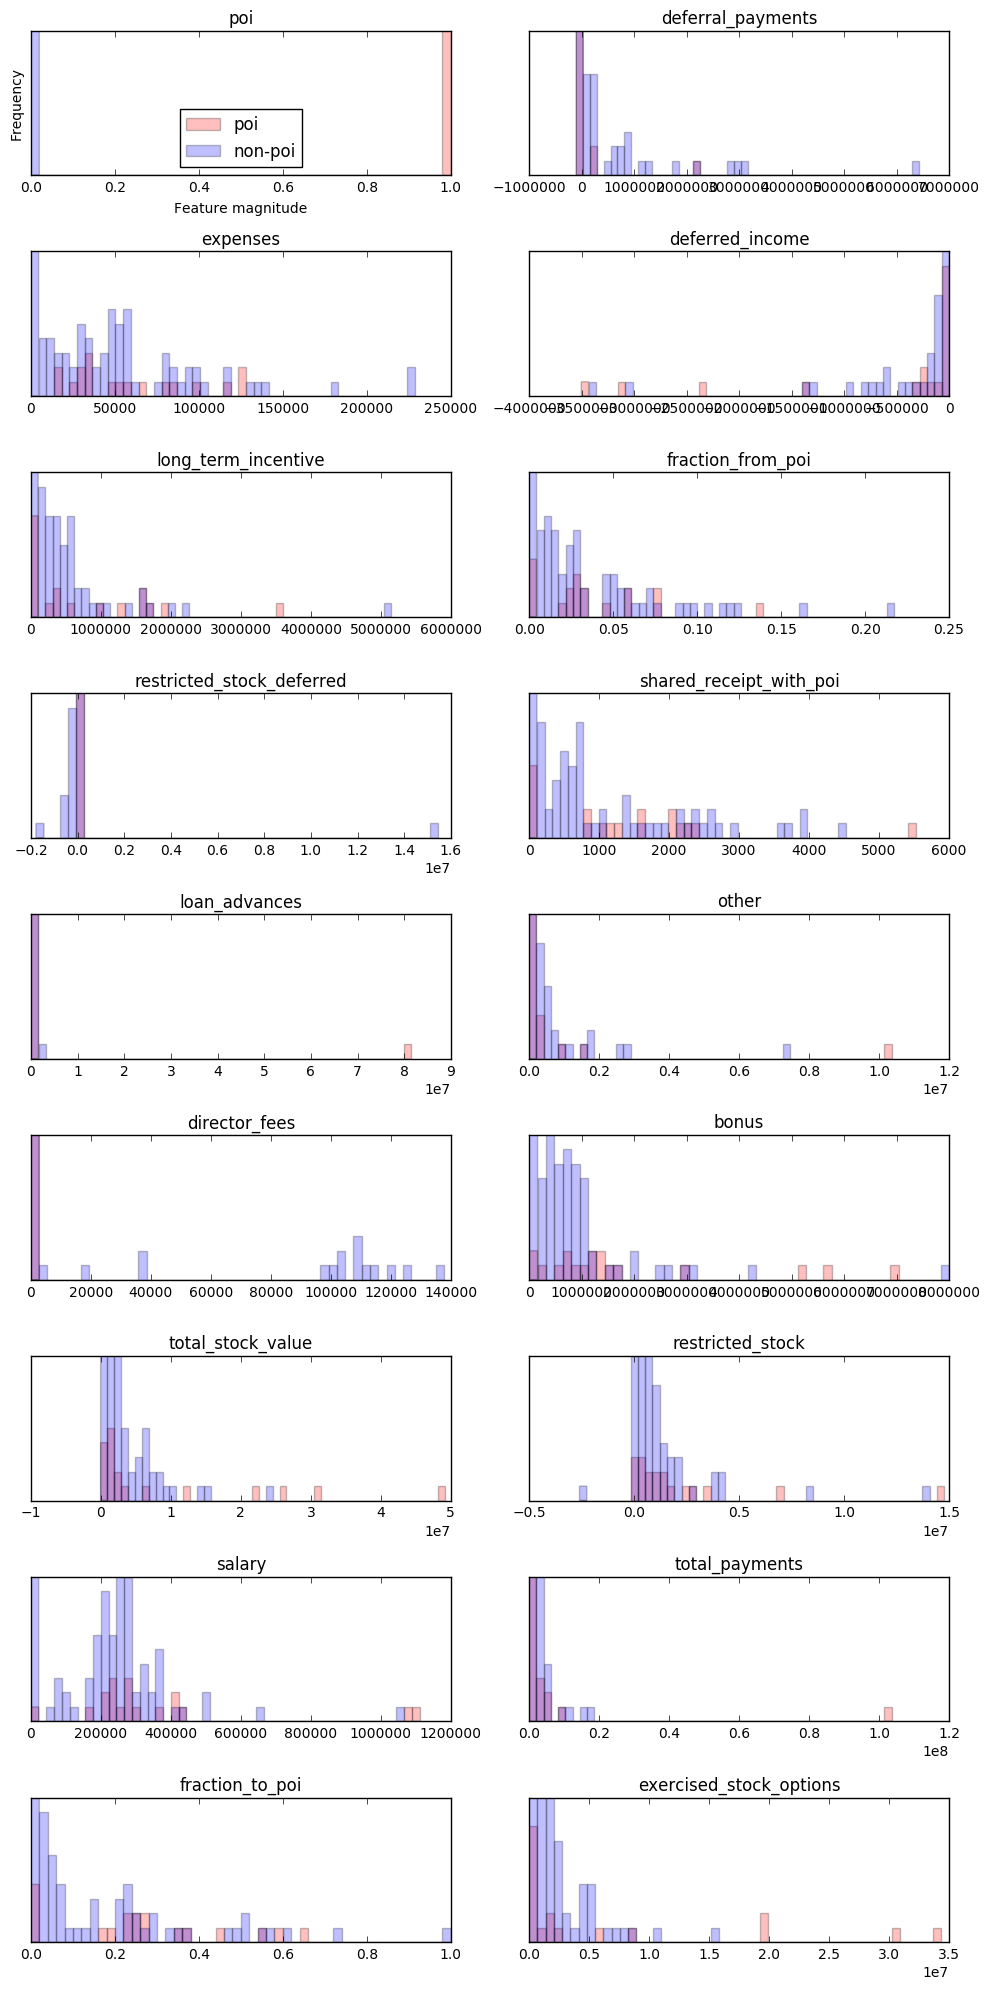

In [34]:
fig, axes = plt.subplots(9, 2, figsize=(10,20))
ax = axes.ravel()
for i, _ in enumerate(features_list):
    _, bins = np.histogram(data[:, i], bins=50)
    ax[i].hist(poi[:, i], bins=bins, color='r', alpha=0.25)
    ax[i].hist(non_poi[:, i], bins=bins, color='b', alpha=0.25)
    ax[i].set_title(features_list[i])
    ax[i].set_ylim([0,10])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["poi", "non-poi"], loc="best")
fig.tight_layout()

From the above histograms, it's not very easy to pick features because the histograms in each feature for non-poi and poi are not totally separated. There's a big overlap between poi and non-poi. However, their distributions are different. Preliminary discarding features will depend on distributions. The potential features to discard are:

- deferral_payments
- restricted_stock_deferred
- director_fees

For the first attempt in optimizing the classifier, I will start by using all the 18 features at this point:

In [35]:
features_list

['poi',
 'deferral_payments',
 'expenses',
 'deferred_income',
 'long_term_incentive',
 'fraction_from_poi',
 'restricted_stock_deferred',
 'shared_receipt_with_poi',
 'loan_advances',
 'other',
 'director_fees',
 'bonus',
 'total_stock_value',
 'restricted_stock',
 'salary',
 'total_payments',
 'fraction_to_poi',
 'exercised_stock_options']

In [36]:
len(features_list)

18

This will be the base feature list:

In [37]:
base_features_list = features_list

#### Store data_dict to my_dataset for easy export

In [38]:
my_dataset = data_dict

#### Extract features and labels from dataset for local testing

In [39]:
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

## Task 4: Try a variety of classifiers

Please name your classifier clf for easy export below. Note that if you want to do PCA or other multi-stage operations, you'll need to used Pipelines. For more info: http://scikit-learn.org/stable/modules/pipeline.html

### Splitting the features to test and train, converting to numpy arrays

In [40]:
from sklearn import model_selection

In [41]:
features_train, features_test, labels_train, labels_test = model_selection.train_test_split(features, labels, test_size=0.3, random_state=42)

In [42]:
features_train = np.array(features_train)
features_test = np.array(features_test)
labels_train = np.array(labels_train)
labest_test = np.array(labels_train)

### Making a Pipeline

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#### Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
pipe = make_pipeline(MinMaxScaler(), PCA(random_state=42), DecisionTreeClassifier(random_state=42))

Pipeline steps:

In [46]:
pipe.steps

[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('pca',
  PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)),
 ('decisiontreeclassifier',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              presort=False, random_state=42, splitter='best'))]

In [47]:
param_grid = {'pca__n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10], 
              'decisiontreeclassifier__min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit

In [49]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=cv)

In [52]:
grid.fit(features_train, labels_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=Non...plit=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'decisiontreeclassifier__min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'pca__n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [53]:
grid.score(features_test, labels_test)

0.95348837209302328

In [54]:
grid.best_score_

0.83999999999999997

In [55]:
grid.best_params_

{'decisiontreeclassifier__min_samples_split': 18, 'pca__n_components': 10}

In [56]:
grid.best_estimator_

Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,...lit=18, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'))])

In [57]:
grid.best_estimator_.named_steps["decisiontreeclassifier"]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=18, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [58]:
grid.best_estimator_.named_steps["pca"]

PCA(copy=True, iterated_power='auto', n_components=10, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [59]:
grid.best_estimator_.named_steps["pca"].n_components_

10

In [60]:
grid.best_estimator_.named_steps["pca"].explained_variance_ratio_

array([ 0.33899221,  0.15391044,  0.11383137,  0.0934518 ,  0.07233598,
        0.05716161,  0.03749206,  0.03380555,  0.02702912,  0.0230194 ])

In [61]:
grid.best_estimator_.named_steps["pca"].components_

array([[ 0.11171377,  0.2045426 , -0.18229876,  0.21775409,  0.13668375,
        -0.01656604,  0.31822334,  0.14995638,  0.22964027, -0.30235472,
         0.34672154,  0.2468844 ,  0.25908281,  0.43379747,  0.18113205,
         0.2234747 ,  0.24279232],
       [-0.00491392, -0.04423829, -0.02643697,  0.11617892, -0.27386692,
         0.01939626, -0.11346397,  0.16644755,  0.20392824,  0.77732494,
         0.11247932,  0.21562712,  0.23539046,  0.05722859,  0.16499297,
        -0.18549387,  0.20635488],
       [-0.11727505, -0.28027441,  0.19040656,  0.10428193, -0.34765951,
        -0.0058086 , -0.39807153,  0.11001323,  0.11656592, -0.52936261,
        -0.08091503,  0.20228181,  0.24727591, -0.03771558,  0.09523617,
        -0.34996022,  0.18360617],
       [-0.17214021,  0.82793278,  0.21348961, -0.09667772, -0.24363192,
         0.0091778 ,  0.10221923, -0.02049379, -0.07160549, -0.053472  ,
         0.0019504 , -0.03291195,  0.04496775,  0.03629419, -0.02974517,
        -0.37667167

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [63]:
pred = grid.predict(features_test)

In [64]:
accuracy = round(accuracy_score(labels_test, pred), 3)
accuracy

0.953

In [65]:
confusion_matrix(labels_test, pred)

array([[37,  1],
       [ 1,  4]])

In [66]:
from sklearn.metrics import recall_score, precision_score

In [67]:
precision_score(labels_test, pred)

0.80000000000000004

In [68]:
recall_score(labels_test, pred)

0.80000000000000004

In [69]:
from sklearn.metrics import classification_report

In [70]:
print classification_report(labels_test, pred)

             precision    recall  f1-score   support

        0.0       0.97      0.97      0.97        38
        1.0       0.80      0.80      0.80         5

avg / total       0.95      0.95      0.95        43



#### Using StandardScaler instead of MinMaxScaler

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
pipe = make_pipeline(StandardScaler(), PCA(random_state=42), DecisionTreeClassifier(random_state=42))

In [74]:
pipe.steps

[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('pca',
  PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)),
 ('decisiontreeclassifier',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              presort=False, random_state=42, splitter='best'))]

In [75]:
param_grid = {'pca__n_components': [2,3], 'decisiontreeclassifier__min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}

In [76]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=cv)

In [77]:
grid.fit(features_train, labels_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', ...plit=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'decisiontreeclassifier__min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'pca__n_components': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [78]:
round(grid.score(features_test, labels_test), 3)

0.767

In [79]:
round(grid.best_score_, 3)

0.83

In [80]:
grid.best_params_

{'decisiontreeclassifier__min_samples_split': 18, 'pca__n_components': 2}

In [81]:
grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max...lit=18, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'))])

In [82]:
grid.best_estimator_.named_steps['pca'].components_

array([[ 0.1276566 ,  0.10150823, -0.14548181,  0.24401571,  0.05789655,
        -0.01477235,  0.17359541,  0.3056453 ,  0.33174503, -0.08696929,
         0.31323323,  0.34332335,  0.29821038,  0.31034847,  0.34089124,
         0.13253826,  0.33607048],
       [-0.34191862, -0.14312103,  0.34971085,  0.00157045, -0.37700085,
         0.08278935, -0.37356609,  0.2625838 ,  0.0973727 ,  0.21639121,
        -0.12957359,  0.19644597,  0.20473738, -0.19760309,  0.19204972,
        -0.35222064,  0.17096347]])

In [83]:
pred = grid.predict(features_test)

In [84]:
accuracy = round(accuracy_score(labels_test, pred), 3)
accuracy

0.767

In [85]:
confusion_matrix(labels_test, pred)

array([[31,  7],
       [ 3,  2]])

In [87]:
print "precision score: ", precision_score(labels_test, pred)
print "recall score: ", recall_score(labels_test, pred)

precision score:  0.222222222222
recall score:  0.4


In [88]:
print classification_report(labels_test, pred)

             precision    recall  f1-score   support

        0.0       0.91      0.82      0.86        38
        1.0       0.22      0.40      0.29         5

avg / total       0.83      0.77      0.79        43



<-- These results are not as good as the results from using MinMaxScaler()

** Trying SelectKBest instead of PCA **

In [89]:
features_list

['poi',
 'deferral_payments',
 'expenses',
 'deferred_income',
 'long_term_incentive',
 'fraction_from_poi',
 'restricted_stock_deferred',
 'shared_receipt_with_poi',
 'loan_advances',
 'other',
 'director_fees',
 'bonus',
 'total_stock_value',
 'restricted_stock',
 'salary',
 'total_payments',
 'fraction_to_poi',
 'exercised_stock_options']

In [90]:
from sklearn.feature_selection import SelectKBest

In [91]:
pipe = make_pipeline(MinMaxScaler(), SelectKBest(), DecisionTreeClassifier(random_state=42))

In [92]:
param_grid = {'selectkbest__k': [2,3,4,5,6,7,8], 
              'decisiontreeclassifier__min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]}

In [93]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=cv)

In [94]:
grid.fit(features_train, labels_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selectkbest', SelectKBest(k=10, score_func=<function f_classif at 0x102389938>)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_featur...lit=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'decisiontreeclassifier__min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22], 'selectkbest__k': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [95]:
round(grid.score(features_test, labels_test), 3)

0.837

In [96]:
confusion_matrix(labels_test, pred)

array([[31,  7],
       [ 3,  2]])

In [97]:
grid.best_params_

{'decisiontreeclassifier__min_samples_split': 8, 'selectkbest__k': 2}

In [99]:
print "precision score: ", precision_score(labels_test, pred)
print "recall score: ", recall_score(labels_test, pred)

precision score:  0.222222222222
recall score:  0.4


In [100]:
print classification_report(labels_test, pred)

             precision    recall  f1-score   support

        0.0       0.91      0.82      0.86        38
        1.0       0.22      0.40      0.29         5

avg / total       0.83      0.77      0.79        43



<-- These results are also not as good as using PCA.

** So far, at this point, it is best to use MinMaxScaler (instead of StandardScaler) and PCA (instead of SelectKBest). Now, it is time to change the classifier. **

### Gaussian Naive Bayes

In [101]:
from sklearn.naive_bayes import GaussianNB

In [102]:
#from sklearn.pipeline import Pipeline
pipe = make_pipeline(MinMaxScaler(), PCA(random_state=42), GaussianNB())

In [103]:
param_grid = {'pca__n_components': [2,3,4,5,6,7]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=cv)

In [104]:
grid.fit(features_train, labels_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('gaussiannb', GaussianNB(priors=None))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [105]:
print "accuracy score: ", grid.score(features_test, labels_test)

accuracy score:  0.860465116279


In [106]:
grid.best_params_

{'pca__n_components': 2}

In [107]:
pred = grid.predict(features_test)

In [108]:
confusion_matrix(labels_test, pred)

array([[36,  2],
       [ 4,  1]])

In [109]:
precision_score(labels_test, pred)

0.33333333333333331

In [110]:
recall_score(labels_test, pred)

0.20000000000000001

<-- Not as good as the Decision Tree results

### SVM

In [111]:
from sklearn.svm import SVC

In [120]:
pipe = make_pipeline(MinMaxScaler(), PCA(random_state=42), SVC(random_state=42))

In [121]:
param_grid = {'pca__n_components': [2,3],
              'svc__C': [0.001, 0.1, 1, 10],
              'svc__gamma': [5e-10, 1e-9, 5e-9, 1e-8],
              'svc__kernel': ['rbf', 'poly']}

In [122]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=cv)

In [123]:
grid.fit(features_train, labels_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'svc__gamma': [5e-10, 1e-09, 5e-09, 1e-08], 'pca__n_components': [2, 3], 'svc__kernel': ['rbf', 'poly'], 'svc__C': [0.001, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [124]:
grid.score(features_test, labels_test)

0.88372093023255816

In [125]:
pred = grid.predict(features_test)

In [126]:
confusion_matrix(labels_test, pred)

array([[38,  0],
       [ 5,  0]])

In [127]:
grid.best_params_

{'pca__n_components': 2,
 'svc__C': 0.001,
 'svc__gamma': 5e-10,
 'svc__kernel': 'rbf'}

<-- Scores still not as good as Decision Tree

### KNN

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
pipe = make_pipeline(MinMaxScaler(), PCA(random_state=42), KNeighborsClassifier())

In [130]:
grid_param = {'pca__n_components': [2,3,4,5],
              'kneighborsclassifier__n_neighbors': [2,3,4,5,6,7,8,9,10,12,15,20]}

In [131]:
grid = GridSearchCV(pipe, grid_param, cv=cv)

In [132]:
grid.fit(features_train, labels_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [2, 3, 4, 5], 'kneighborsclassifier__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [133]:
grid.score(features_test, labels_test)

0.88372093023255816

In [134]:
pred = grid.predict(features_test)

In [135]:
confusion_matrix(labels_test, pred)

array([[38,  0],
       [ 5,  0]])

In [136]:
grid.best_params_

{'kneighborsclassifier__n_neighbors': 2, 'pca__n_components': 4}

<-- Results not better.

### AdaBoost

In [137]:
from sklearn.ensemble import AdaBoostClassifier

In [138]:
pipe = make_pipeline(MinMaxScaler(), PCA(random_state=42), AdaBoostClassifier(random_state=42))

In [139]:
param_grid = {'pca__n_components': [2,3,4,5,6],
              'adaboostclassifier__n_estimators': [10, 50, 100, 200, 300, 400]}

In [140]:
grid = GridSearchCV(pipe, param_grid, cv=cv)

In [141]:
grid.fit(features_train, labels_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('adaboostclassifier', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [2, 3, 4, 5, 6], 'adaboostclassifier__n_estimators': [10, 50, 100, 200, 300, 400]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [142]:
pred = grid.predict(features_test)
print "accuracy: ", grid.score(features_test, labels_test)
print "confusion matrix: \n", confusion_matrix(labels_test, pred)

accuracy:  0.883720930233
confusion matrix: 
[[36  2]
 [ 3  2]]


In [143]:
precision_score(labels_test, pred)

0.5

In [144]:
recall_score(labels_test, pred)

0.40000000000000002

In [145]:
print classification_report(labels_test, pred)

             precision    recall  f1-score   support

        0.0       0.92      0.95      0.94        38
        1.0       0.50      0.40      0.44         5

avg / total       0.87      0.88      0.88        43



<-- Results good but not as good as Decision Tree above!

### Random Forest

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
pipe = make_pipeline(MinMaxScaler(), PCA(random_state=42), RandomForestClassifier(random_state=42))

In [148]:
param_grid = {'pca__n_components': [2,3],
              'randomforestclassifier__n_estimators': [2, 3, 4, 5, 10, 20]}

In [149]:
grid = GridSearchCV(pipe, param_grid, cv=cv)

In [150]:
grid.fit(features_train, labels_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini...stimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [2, 3], 'randomforestclassifier__n_estimators': [2, 3, 4, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [151]:
print "accuracy score: ", grid.score(features_test, labels_test)

accuracy score:  0.883720930233


In [152]:
pred = grid.predict(features_test)

In [153]:
confusion_matrix(labels_test, pred)

array([[37,  1],
       [ 4,  1]])

In [154]:
grid.best_params_

{'pca__n_components': 2, 'randomforestclassifier__n_estimators': 4}

In [155]:
recall_score(labels_test, pred)

0.20000000000000001

In [156]:
precision_score(labels_test, pred)

0.5

<-- Results not as good as Decision Tree!

### Task 5: Tune your classifier to achieve better than .3 precision and recall using our testing script. 

Check the tester.py script in the final project folder for details on the evaluation method, especially the test_classifier function. Because of the small size of the dataset, the script uses stratified shuffle split cross validation. For more info: 

http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

Example starting point. Try investigating other evaluation techniques!

```
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
```
After creating poi_id.py using the best classifier obtained above (MinMaxScaler(), PCA(), DecisionTreeClassifier()), I obtained the same results as above:

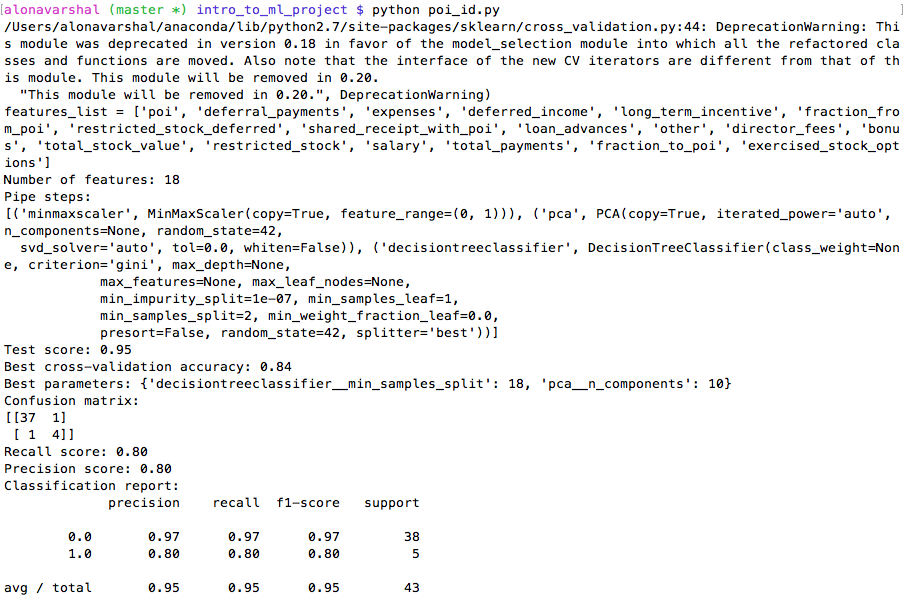

In [71]:
from IPython.display import Image
Image("poi_id_results.png")

However, after running "tester.py" using the pkl files resulting from running "poi_id.py" above, it didn't get a precision and score similar to the ones above:

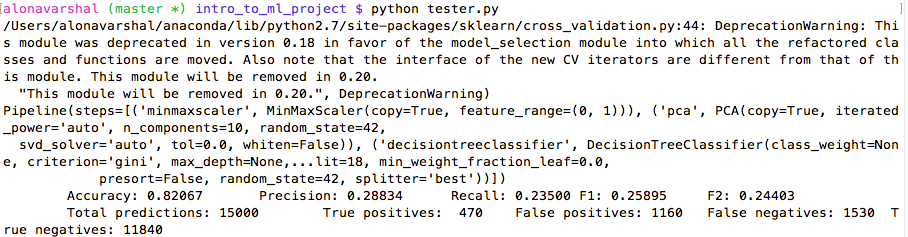

In [72]:
Image('tester_results.png')

### Task 6: Dump your classifier, dataset, and features_list so anyone can check your results. 

You do not need to change anything below, but make sure that the version of poi_id.py that you submit can be run on its own and generates the necessary .pkl files for validating your results.

```
dump_classifier_and_data(clf, my_dataset, features_list)
```

This was done in the poi_id.py I wrote and used above.
